In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

# Лабораторная работа №4
## Классификация ядовитых и съедобных грибов
Необходимо обучить персептрон на одном из использованных выше наборах
данных и сравнить точность его работы с использованными ранее методами (см. л/р
№2).

### Набор данных
Mushroom Classification (https://www.kaggle.com/datasets/uciml/student-alcohol-consumption)

![подпись](https://storage.googleapis.com/kaggle-datasets-images/478/974/557711140aeab7ca242d1e903c4e058e/dataset-cover.jpg)


#### Содержимое

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам пластинчатых грибов семейства Агариковые и Лепиота, взятых из "The Audubon Society Field Guide to North American Mushrooms" (1981). Каждый вид идентифицирован как съедобный, ядовитый или неизвестно съедобный ли и не рекомендуемый. Последний класс был объединен с ядовитым. В справочнике четко сказано, что не существует простого правила для определения съедобности гриба;

In [4]:
df=pd.read_csv('data/mushrooms.csv')
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


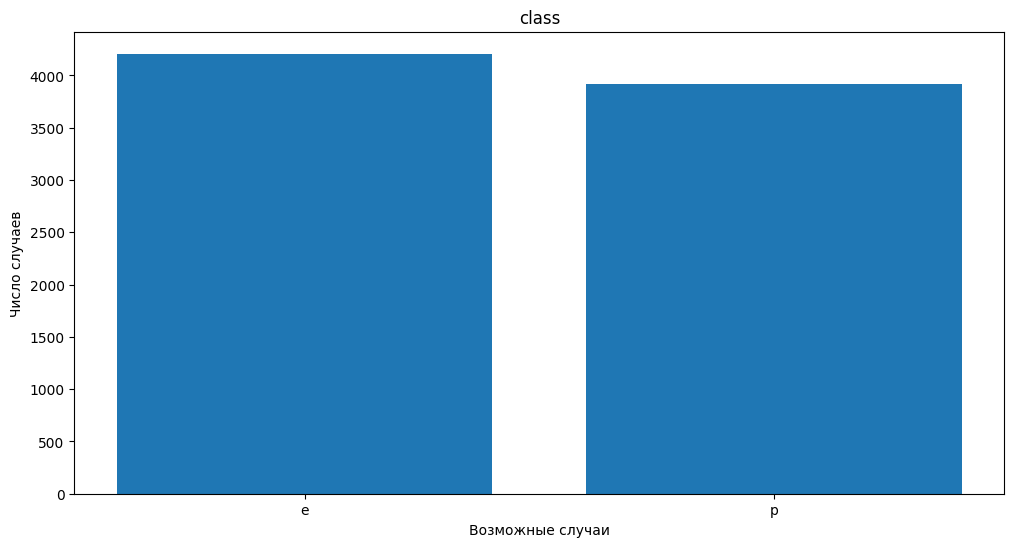

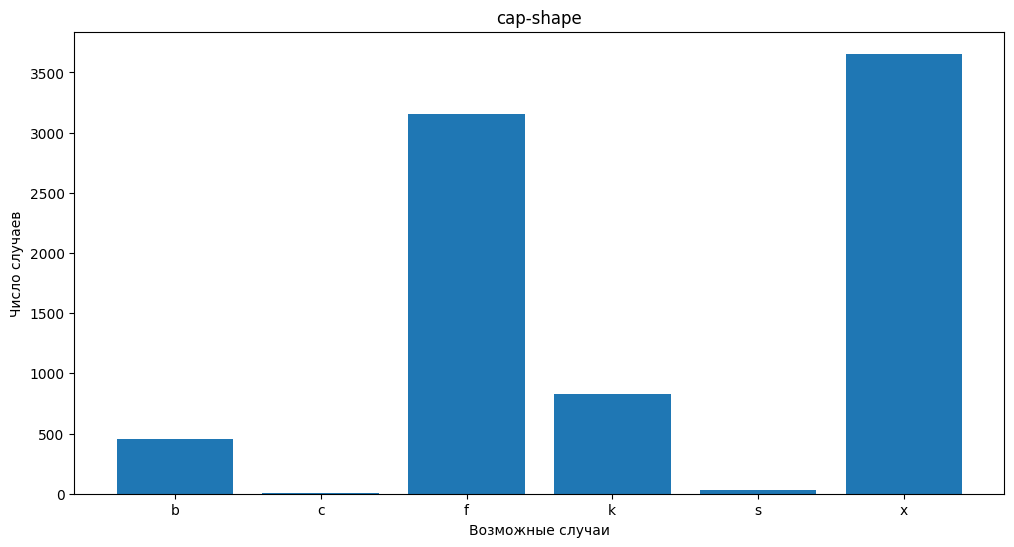

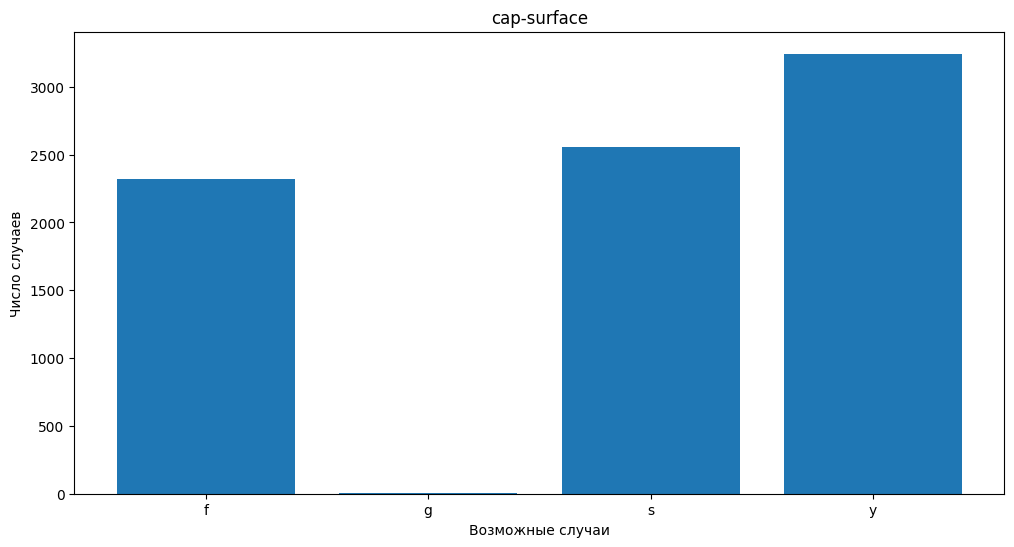

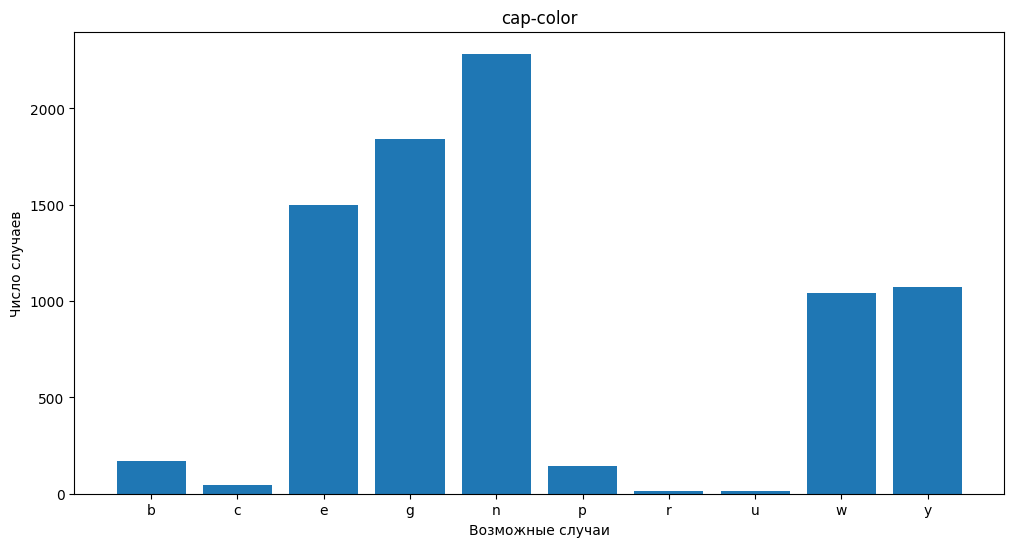

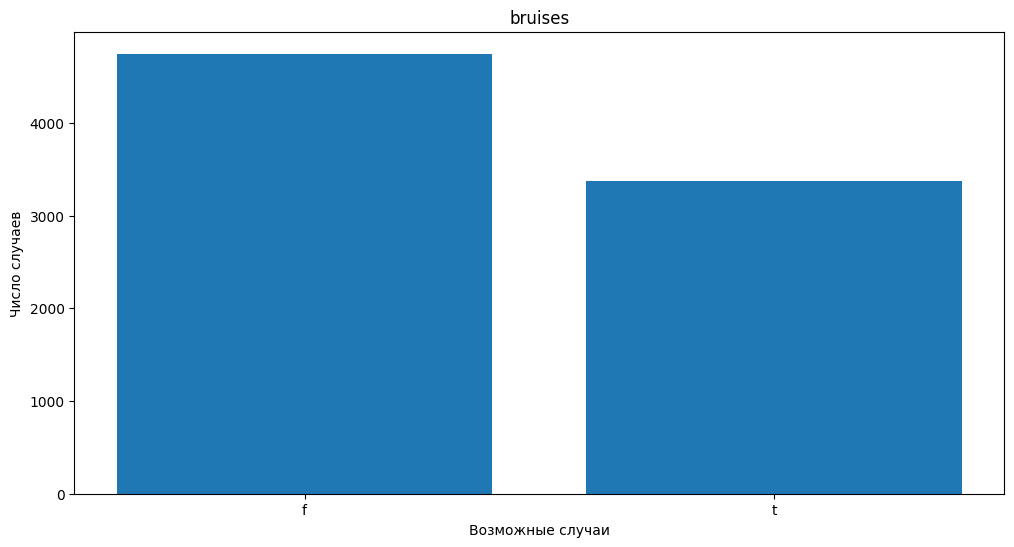

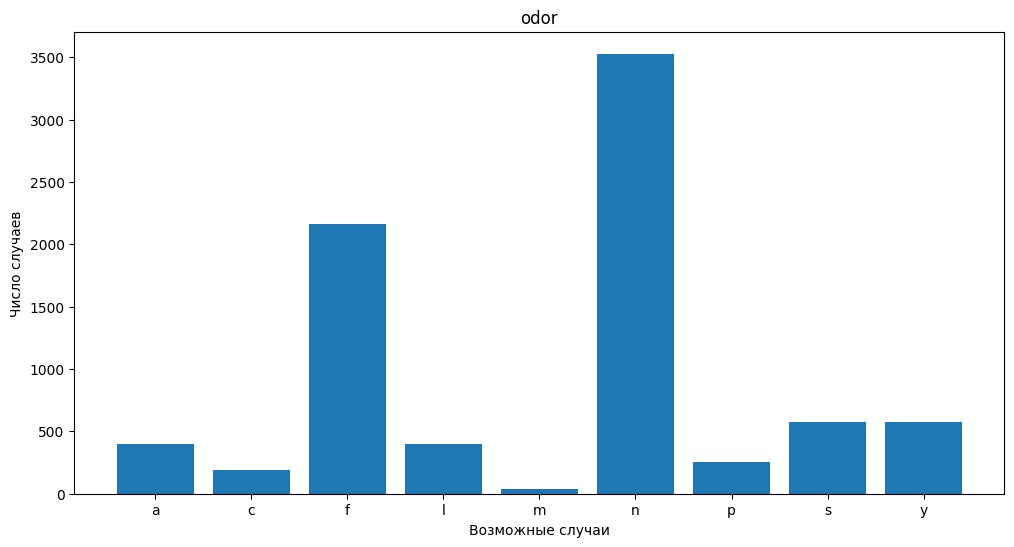

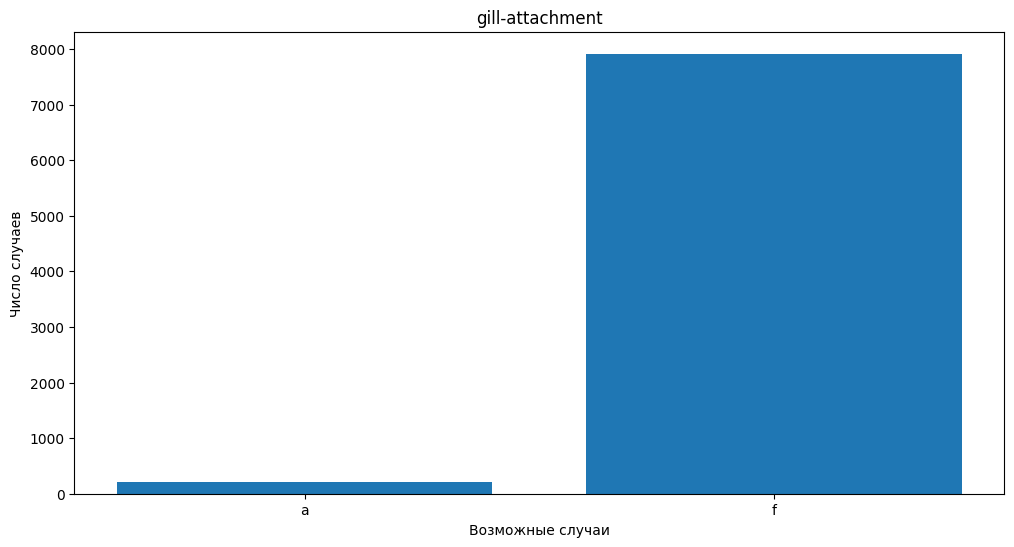

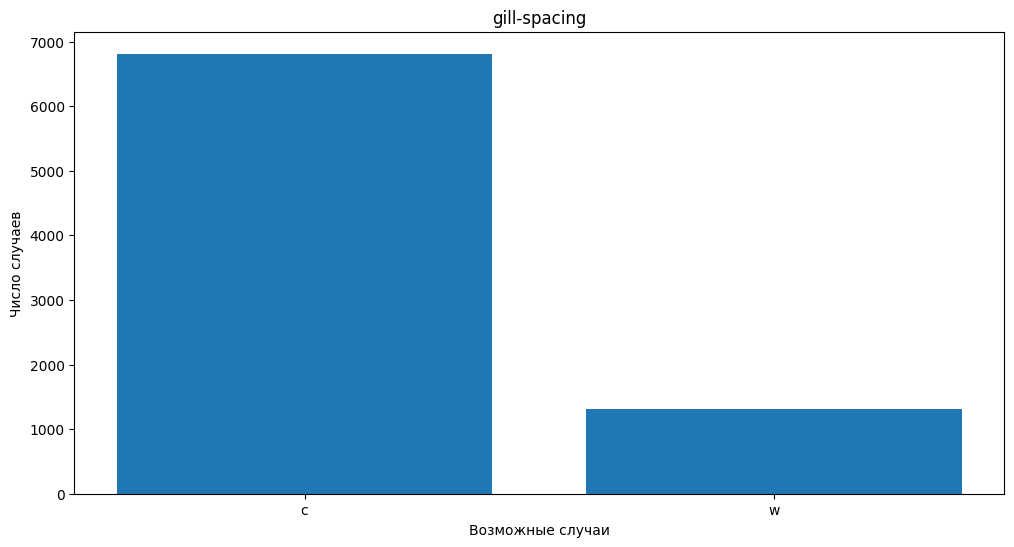

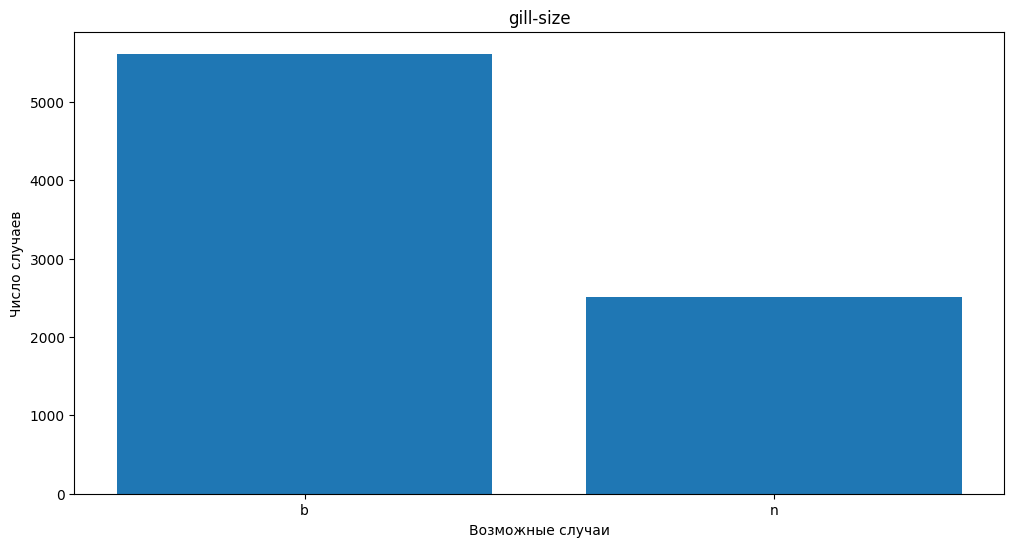

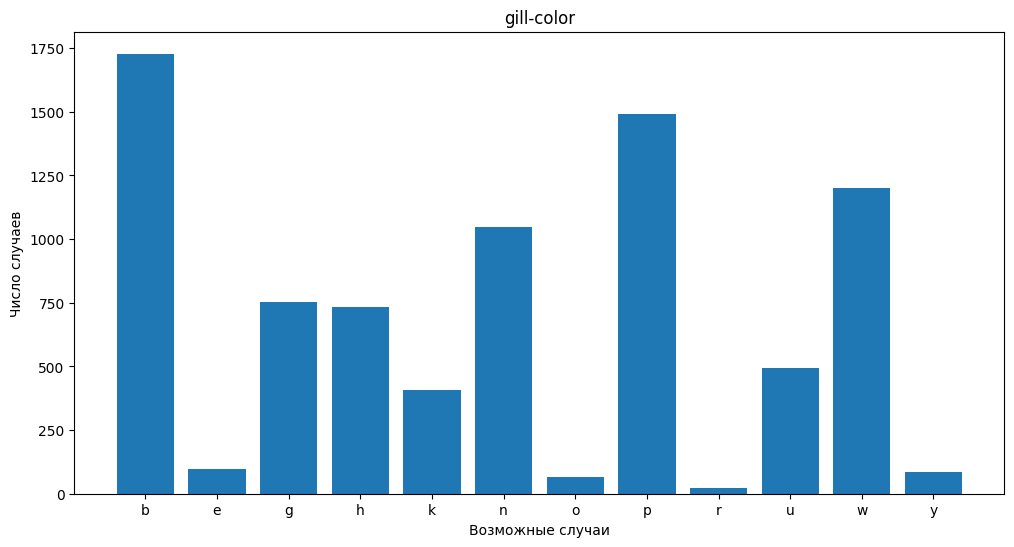

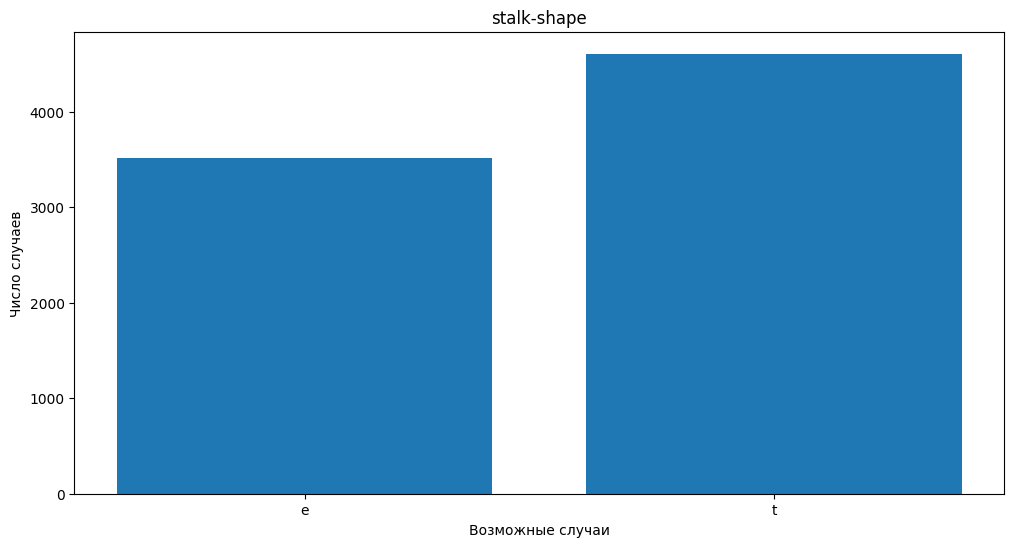

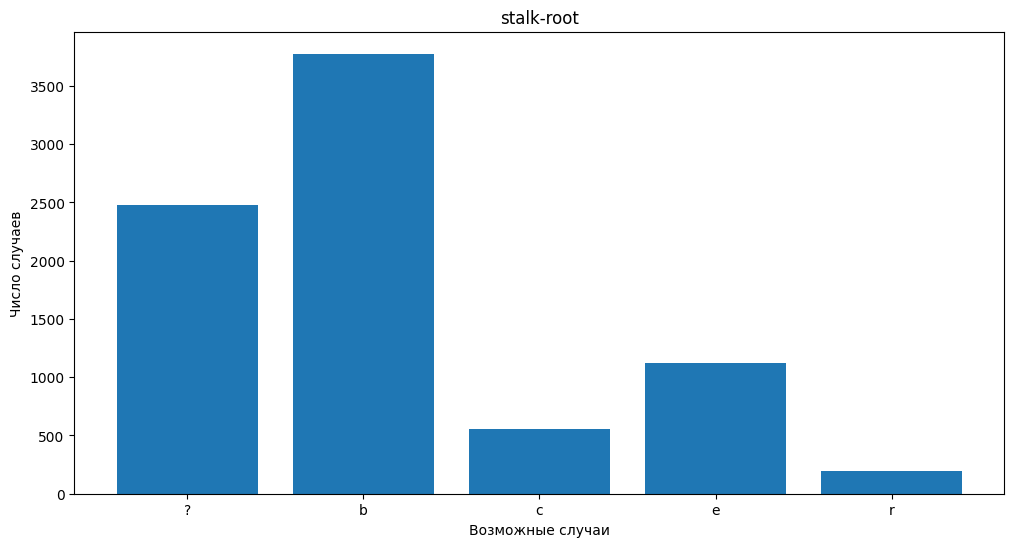

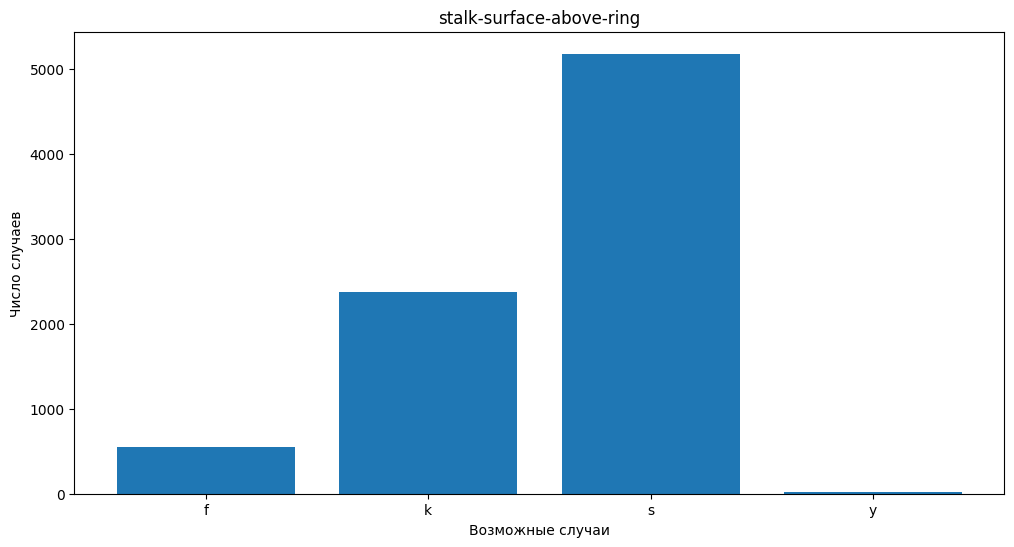

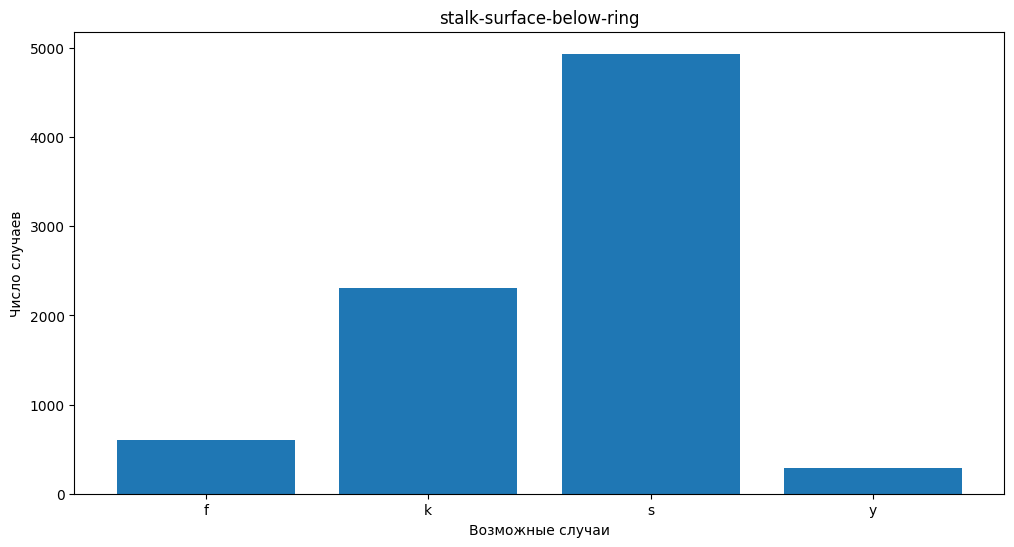

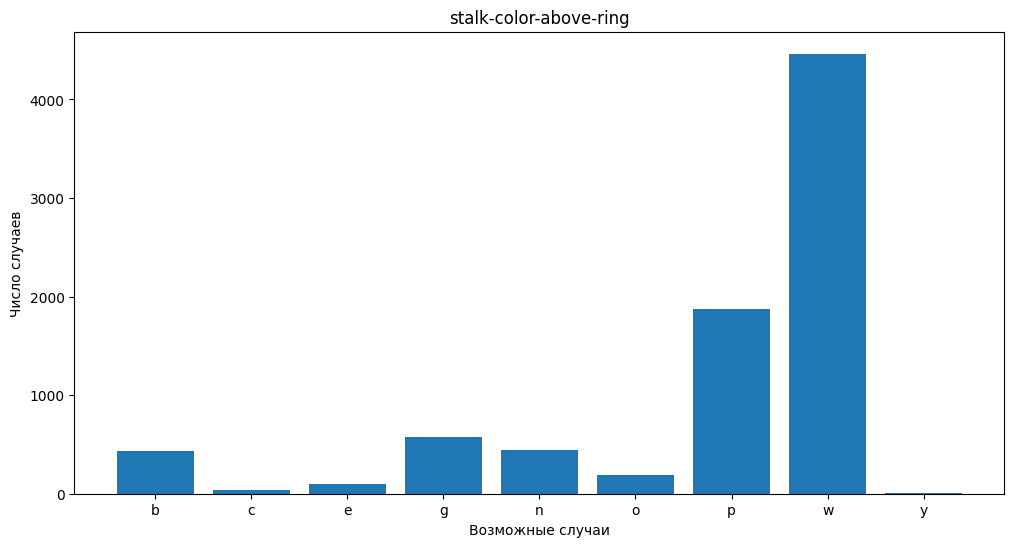

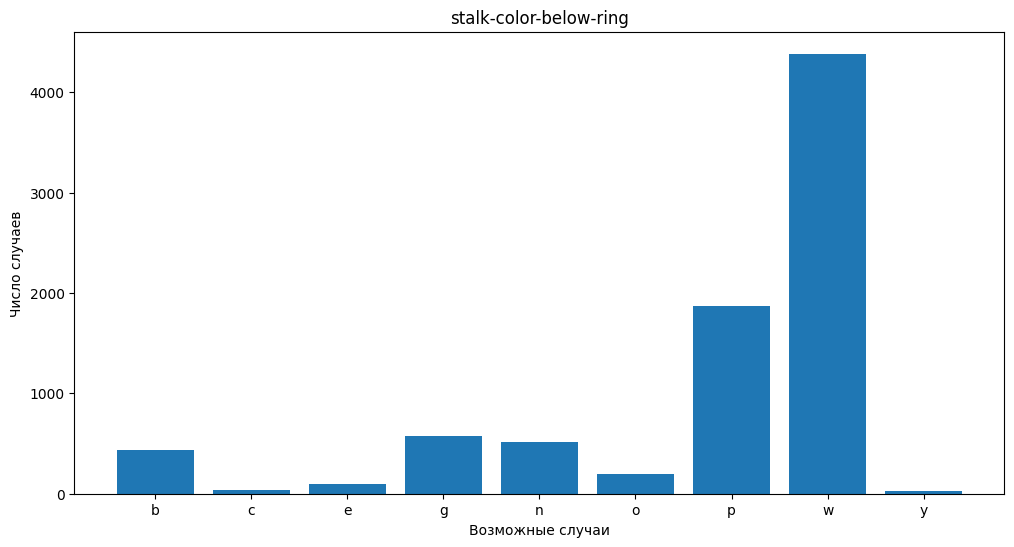

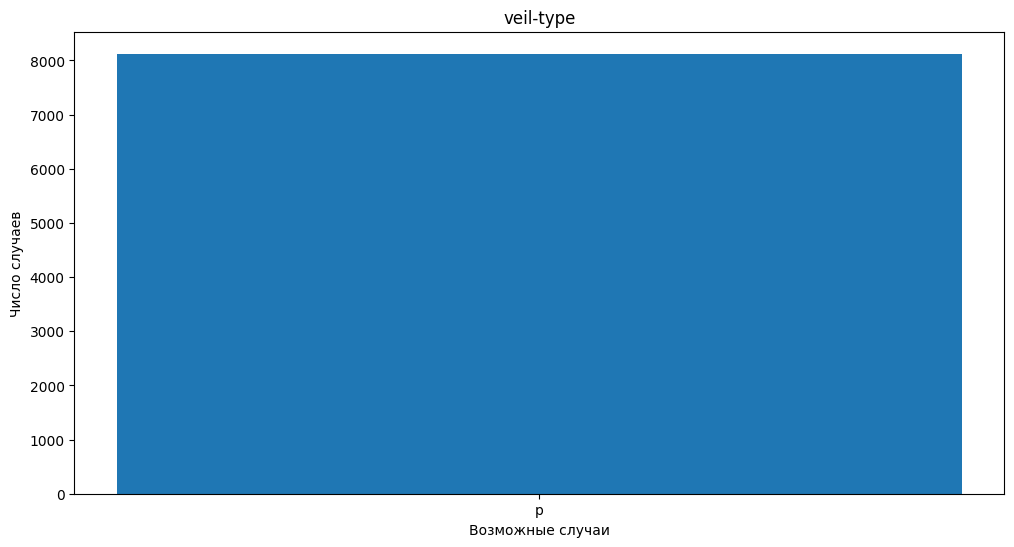

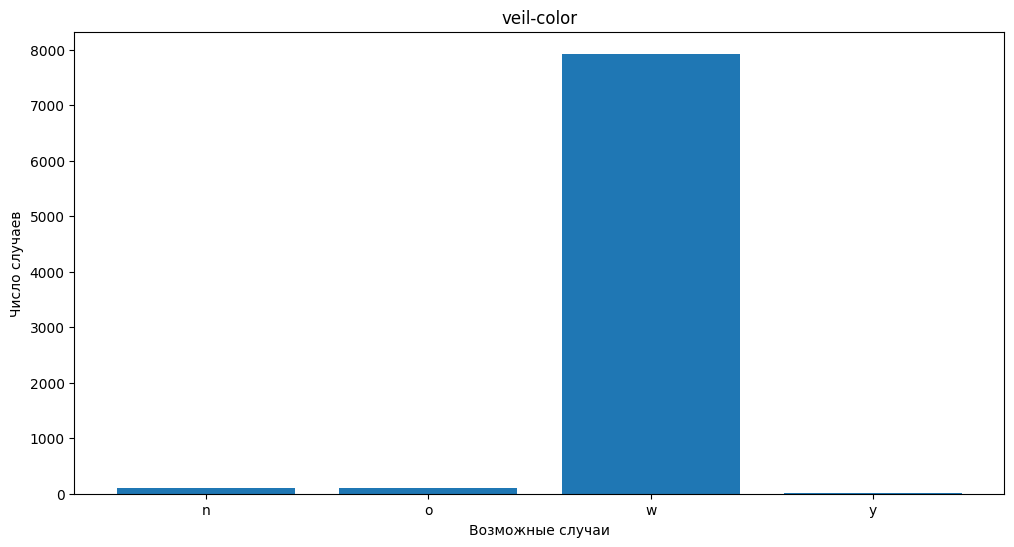

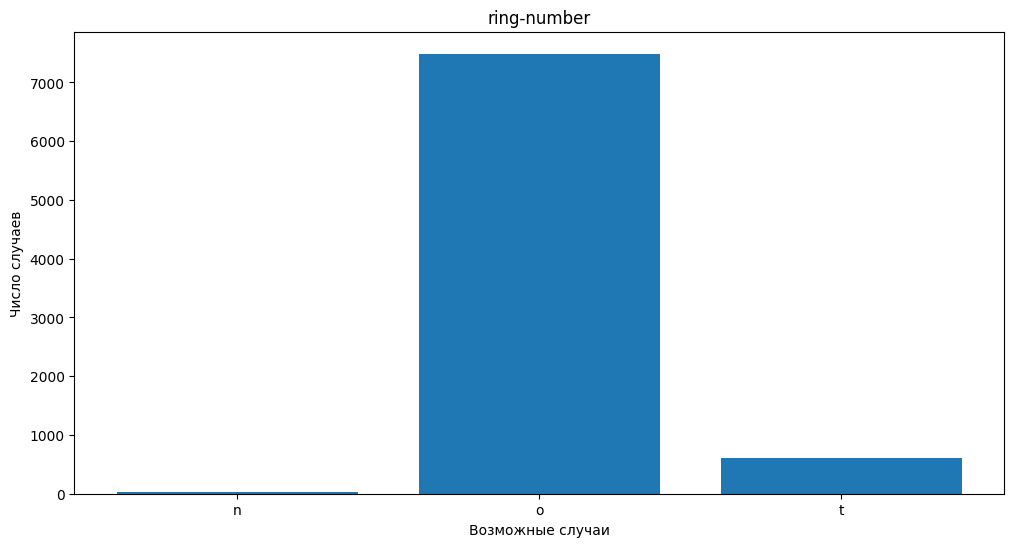

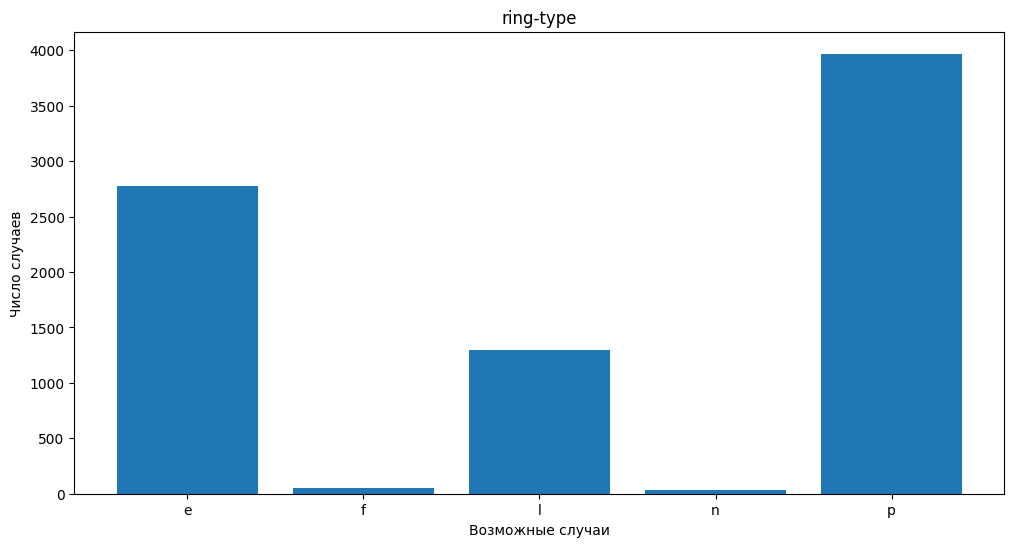

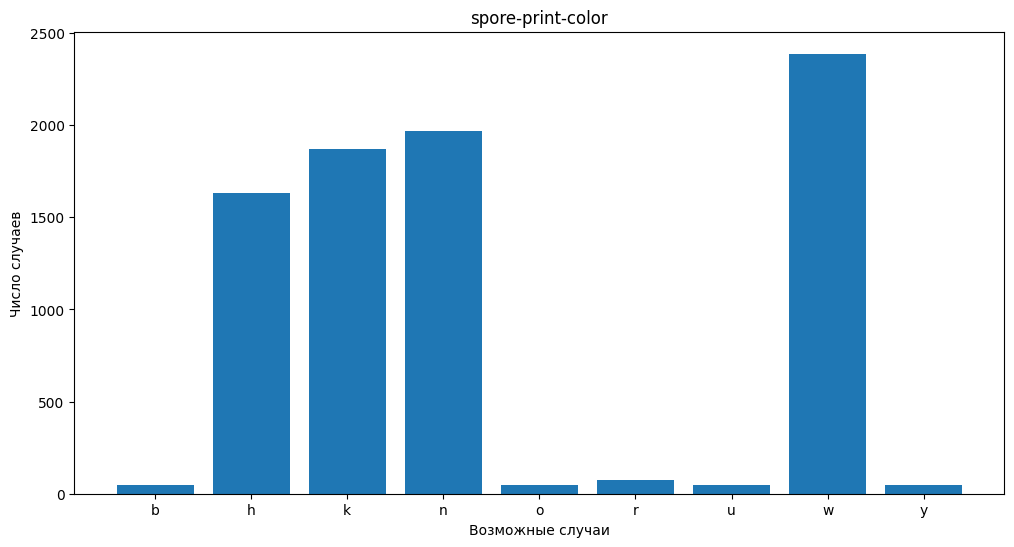

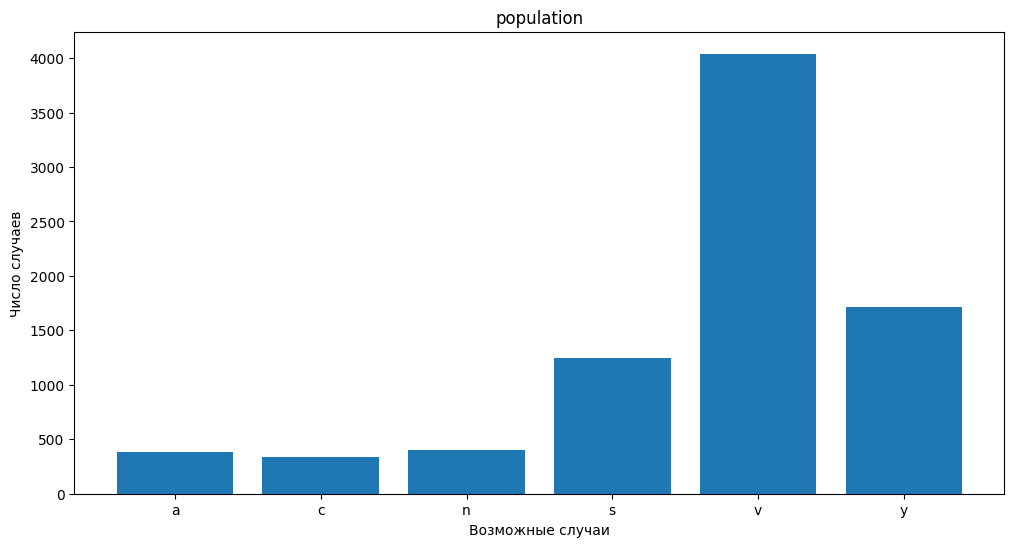

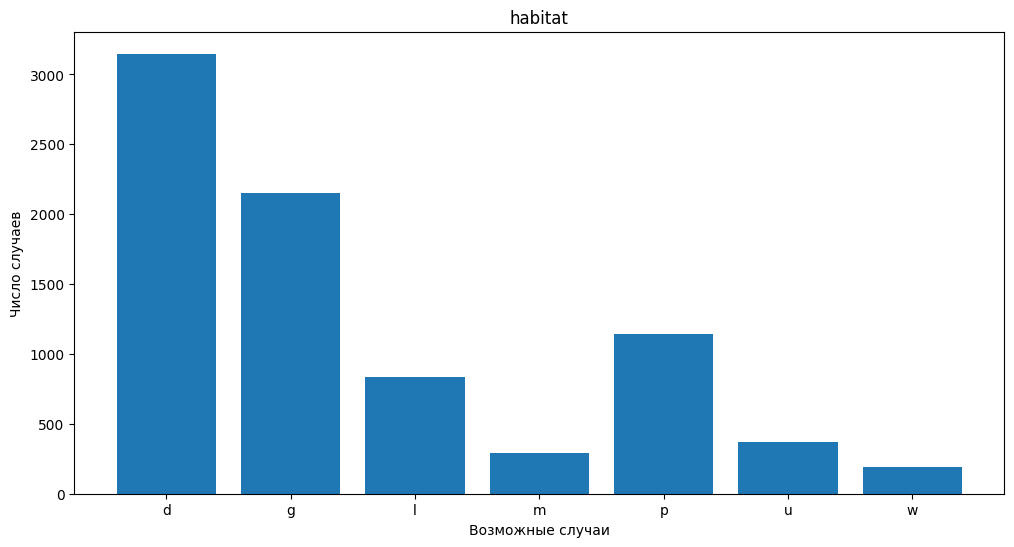

In [6]:
for col_name in df.columns:
    unique,counts=np.unique(df[col_name],return_counts=True)
    plt.figure(figsize=(12,6))
    plt.title(col_name)
    plt.bar(unique,counts)
    plt.ylabel('Число случаев')
    plt.xlabel('Возможные случаи')
    plt.show()

## Подготовка данных
Преобразование категориальных данных в числовые с помощью

In [7]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int8 
 1   cap-shape                 8124 non-null   int8 
 2   cap-surface               8124 non-null   int8 
 3   cap-color                 8124 non-null   int8 
 4   bruises                   8124 non-null   int8 
 5   odor                      8124 non-null   int8 
 6   gill-attachment           8124 non-null   int8 
 7   gill-spacing              8124 non-null   int8 
 8   gill-size                 8124 non-null   int8 
 9   gill-color                8124 non-null   int8 
 10  stalk-shape               8124 non-null   int8 
 11  stalk-root                8124 non-null   int8 
 12  stalk-surface-above-ring  8124 non-null   int8 
 13  stalk-surface-below-ring  8124 non-null   int8 
 14  stalk-color-above-ring    8124 non-null 

Для обучения модели разделим данные на обучающую и тестовую выборку

In [9]:
df['class']

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int8

In [10]:
y=df.pop('class')

In [11]:
x=df.values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Создадим наш перцептрон

In [16]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

In [17]:
model = Perceptron(random_state=42)
model.fit(X_train, y_train)

Perceptron(random_state=42)

Оценим точность перцептрона

In [18]:
y_pred = model.predict(X_test)

In [19]:
acc = accuracy_score(y_pred, y_test)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print('Точность:', acc)
print('F-мера:', f1)
print('ROC AUC:', roc_auc)

Точность: 0.952
F-мера: 0.9505703422053232
ROC AUC: 0.9522561306744576
